In [2]:
import pymc,imp
from pymc import MAP

Basic model - correlated random walk
====================
parameters
-------------- 
$\rho_m$ - Cauchy parameter that specifies degree of correlation between successive steps

In [2]:
import corRandomWalk

CRW = MAP(corRandomWalk)
CRW.fit(method ='fmin', iterlim=100000, tol=.000001)

print(CRW.AIC)
print(CRW.BIC)
print(CRW.rho_m.value) 


-16427.431790736664
-16419.6441631
0.9324380126953125


Environment model
==========
parameters
-----------
$\rho_m$ - Cauchy parameter that specifies degree of correlation between successive steps

$\rho_e$ - parameter that relates assumed environmental features to heading

$\beta$ - relative weighting of Cauchy distributions

In [3]:
import environment
imp.reload(environment)
E = MAP(environment)
E.fit()#method ='fmin', iterlim=100000, tol=.000001)
print(E.AIC)
print(E.BIC)

print(E.rho_m.value) 
print(E.rho_e.value) 
print(E.beta.value)


-17357.97892195775
-17334.616039
0.9370729103606557
0.9595922942298327
0.12561171470257418


Social models
========

All models use the following parameters

$\rho_s$ - bias in Caucy distribution (how predictive of movement step is social vector)

$\rho_m$ - Cauchy parameter that specifies degree of correlation between successive steps

$\rho_e$ - parameter that relates assumed environmental features to heading

$\alpha$ - relative weighting of social to env/persistence distributions

$\beta$ - relative weighting of env and persistence distributions


Social interaction rules
=============

Model 1
--------

Social vector is the average of relative positions to all neighbours within a constant interaction range

$I_D$ is the maximum interaction distance

$I_A$ is the maximum interaction angle either side of the centre of the animal



In [4]:
import constantModel
imp.reload(constantModel)
CM = MAP(constantModel)
CM.fit()#method ='fmin', iterlim=100000, tol=.00001)
print(CM.AIC)
print(CM.BIC)
print('--------')
print(CM.rho_s.value)
print(CM.alpha.value) 
print('--------')
print(CM.interaction_length.value)
print(CM.interaction_angle.value)
print(CM.ignore_length.value)

-19020.200957656492
-18981.2628193
--------
0.9697041267034892
0.43257601999654294
--------
7.454351913470925
0.1980909268928883
0.5851768886389136


Model 2
--------

Social vector is the weighted average of relative positions to all neighbours and their relative headings within two constant interaction ranges

$At_D$ is the maximum attraction distance

$At_A$ is the maximum attraction angle either side of the centre of the animal

$Al_D$ is the maximum alignment distance

$Al_A$ is the maximum alignment angle either side of the centre of the animal

$Al_W$ is the relative weight of attraction and alignment




In [9]:
import constantModelAlign
import imp
import pymc 
from pymc import MAP
imp.reload(constantModelAlign)

CMA = MAP(constantModelAlign)
CMA.fit()#method ='fmin', iterlim=100000, tol=.000001)
print(CMA.AIC)
print(CMA.BIC)
print('--------')
print(CMA.rho_s.value)
print(CMA.alpha.value) 
print('--------')
print(CMA.attract_length.value)
print(CMA.attract_angle.value)
print(CMA.align_weight.value)
print(CMA.ignore_length.value)


-19266.766168484923
-19220.0404025
--------
0.966368733550763
0.5279746880572919
--------
5.807257264823169
0.2200380508260138
0.7676619480798889
0.22500559285714652


Model 3
--------

Social vector is the average of relative positions to all neighbours weighted according to an exponential decay

$I_A$ is the maximum attraction angle either side of the centre of the animal

The weighting given to each neighbour is 

$\omega_i =  \exp\left(-\left(\frac{D}{I_D}\right)^\gamma\right)$

$\gamma$ decay exponent

$I_D$ peak distance



In [10]:
import decayModel
imp.reload(decayModel)
DM = MAP(decayModel)
DM.fit()#method ='fmin', iterlim=100000, tol=.000001)
print(DM.AIC)
print(DM.BIC)

print(DM.decay_exponent.value)
print(DM.interaction_length.value)
print(DM.interaction_angle.value)

print(DM.rho_s.value)
#print(DM.rho_m.value) 
#print(DM.rho_e.value) 
print(DM.alpha.value) 
#print(DM.beta.value)


-19135.98709355721
-19089.2613276
1.0158308915413252
2.933462776400193
0.18709659822746474
0.9675455415575837
0.3159751440882302


Model 4
--------

Social vector is the weighted average of relative positions to all neighbours and their relative headings within two constant interaction ranges, both weighted with an exponential decay according to distance



$At_A$ is the maximum attraction angle either side of the centre of the animal



$Al_A$ is the maximum alignment angle either side of the centre of the animal

$Al_W$ is the relative weight of attraction and alignment

The weighting given to each neighbour is 

$\omega_i =  \exp\left(-\left(\frac{D_i}{At_D}\right)^{\gamma_{At}}\right)$

$\gamma$ decay exponent

$At_D$ is the peak attraction distance
$Al_D$ is the peak alignment distance

In [3]:
import decayModelAlign

import imp
imp.reload(decayModelAlign)
DMA = MAP(decayModelAlign)
DMA.fit()#method ='fmin', iterlim=100000, tol=.000001)
print(DMA.AIC)
print(DMA.BIC)

print(DMA.attract_exponent.value)
print(DMA.attract_length.value)
print(DMA.attract_angle.value)


print(DMA.ignore_length.value)
print(DMA.align_weight.value)
print(DMA.rho_s.value)
#print(DMA.rho_m.value) 
#print(DMA.rho_e.value) 
print(DMA.alpha.value) 
#print(DMA.beta.value)

-19425.62029890011
-19371.1069052
2.3261788511669925
3.127005383477383
0.18927034550103386
0.017997343663980248
0.9670519183796619
0.3678174046797458


0.7720334136148813
9711.782982093207


NameError: name 'DM' is not defined

Model 5
--------

Social vector is the average of relative positions to all neighbours within a network interaction range

$I_D$ is the maximum number of neighbours

$I_A$ is the maximum interaction angle either side of the centre of the animal



In [14]:
import networkModel

networkModel.netcount=1

NM = MAP(networkModel)
NM.fit(method ='fmin', iterlim=100000, tol=.000001)
print('==== 1 neighbour ====')
print(NM.AIC)
print(NM.BIC)

print(NM.interaction_angle.value)

print(NM.rho_s.value)
#print(NM.rho_m.value) 
#print(NM.rho_e.value) 
print(NM.alpha.value) 
#print(NM.beta.value)

networkModel.netcount=2

NM = MAP(networkModel)
NM.fit(method ='fmin', iterlim=100000, tol=.000001)
print('==== 2 neighbours ====')
print(NM.AIC)
print(NM.BIC)

print(NM.interaction_angle.value)

print(NM.rho_s.value)
#print(NM.rho_m.value) 
#print(NM.rho_e.value) 
print(NM.alpha.value) 
#print(NM.beta.value)

networkModel.netcount=3

NM = MAP(networkModel)
NM.fit(method ='fmin', iterlim=100000, tol=.000001)
print('==== 3 neighbours ====')
print(NM.AIC)
print(NM.BIC)

print(NM.interaction_angle.value)

print(NM.rho_s.value)
#print(NM.rho_m.value) 
#print(NM.rho_e.value) 
print(NM.alpha.value) 
#print(NM.beta.value)

networkModel.netcount=4

NM = MAP(networkModel)
NM.fit(method ='fmin', iterlim=100000, tol=.000001)
print('==== 4 neighbours ====')
print(NM.AIC)
print(NM.BIC)

print(NM.interaction_angle.value)

print(NM.rho_s.value)
#print(NM.rho_m.value) 
#print(NM.rho_e.value) 
print(NM.alpha.value) 
#print(NM.beta.value)

networkModel.netcount=5

NM = MAP(networkModel)
NM.fit(method ='fmin', iterlim=100000, tol=.000001)
print('==== 5 neighbours ====')
print(NM.AIC)
print(NM.BIC)

print(NM.interaction_angle.value)

print(NM.rho_s.value)
#print(NM.rho_m.value) 
#print(NM.rho_e.value) 
print(NM.alpha.value) 
#print(NM.beta.value)

==== 1 neighbour ====
-19031.018582431236
-18992.0804441
0.17988958562562352
0.9684706945728192
0.2966307135771029
==== 3 neighbours ====
-18659.30590630724
-18620.367768
0.18088435731920438
0.9639359332037032
0.30019149967426384
==== 5 neighbours ====
-18532.135866539018
-18493.1977282
0.17983677237735246
0.9629853587594968
0.2971939475174582
==== 7 neighbours ====
-18471.99472927828
-18433.0565909
0.17983596416446485
0.9633430547093778
0.2837063864029576
==== 9 neighbours ====
-18436.9270001208
-18397.9888618
0.17983436824687404
0.9633619534106702
0.2788502131734222


Model 6
--------

Social vector is the average of relative positions to all neighbours and their headings within a network interaction range

$I_D$ is the maximum number of neighbours

$I_A$ is the maximum interaction angle either side of the centre of the animal



In [16]:
import networkModelAlign

networkModelAlign.netcount=1

NM = MAP(networkModelAlign)
NM.fit(method ='fmin', iterlim=100000, tol=.000001)
print('==== 1 neighbour ====')
print(NM.AIC)
print(NM.BIC)

print(NM.interaction_angle.value)
print(NM.align_weight.value)

print(NM.rho_s.value)
#print(NM.rho_m.value) 
#print(NM.rho_e.value) 
print(NM.alpha.value) 
#print(NM.beta.value)

networkModelAlign.netcount=2

NM = MAP(networkModelAlign)
NM.fit(method ='fmin', iterlim=100000, tol=.000001)
print('==== 2 neighbours ====')
print(NM.AIC)
print(NM.BIC)

print(NM.interaction_angle.value)
print(NM.align_weight.value)

print(NM.rho_s.value)
#print(NM.rho_m.value) 
#print(NM.rho_e.value) 
print(NM.alpha.value) 
#print(NM.beta.value)

networkModelAlign.netcount=3

NM = MAP(networkModelAlign)
NM.fit(method ='fmin', iterlim=100000, tol=.000001)
print('==== 3 neighbours ====')
print(NM.AIC)
print(NM.BIC)

print(NM.interaction_angle.value)
print(NM.align_weight.value)

print(NM.rho_s.value)
#print(NM.rho_m.value) 
#print(NM.rho_e.value) 
print(NM.alpha.value) 
#print(NM.beta.value)

networkModelAlign.netcount=4

NM = MAP(networkModelAlign)
NM.fit(method ='fmin', iterlim=100000, tol=.000001)
print('==== 4 neighbours ====')
print(NM.AIC)
print(NM.BIC)

print(NM.interaction_angle.value)
print(NM.align_weight.value)

print(NM.rho_s.value)
#print(NM.rho_m.value) 
#print(NM.rho_e.value) 
print(NM.alpha.value) 
#print(NM.beta.value)

networkModelAlign.netcount=5

NM = MAP(networkModelAlign)
NM.fit(method ='fmin', iterlim=100000, tol=.000001)
print('==== 5 neighbours ====')
print(NM.AIC)
print(NM.BIC)

print(NM.interaction_angle.value)
print(NM.align_weight.value)

print(NM.rho_s.value)
#print(NM.rho_m.value) 
#print(NM.rho_e.value) 
print(NM.alpha.value) 
#print(NM.beta.value)

==== 1 neighbour ====
-19348.838876634596
-19302.1131106
0.18822452180692018
0.7780660844824843
0.9666814761496625
0.326364568578454
==== 3 neighbours ====
-19032.018333871005
-18985.2925679
0.1893437104544476
0.8759353727662713
0.9634500568089948
0.3252005302638361
==== 5 neighbours ====
-18801.01727307728
-18754.2915071
0.18722322503790167
0.8937172142585992
0.9621822516401602
0.31184833596532335
==== 7 neighbours ====
-18700.68084273384
-18653.9550767
0.1872222516550322
0.9705415658271637
0.9623973435549723
0.2988829414410234
==== 9 neighbours ====
-18663.19340211178
-18616.4676361
0.18721719531735975
1.0136259533454255
0.9627413939066337
0.29240386466962043


In [ ]:
print(CM.rep_len.value)

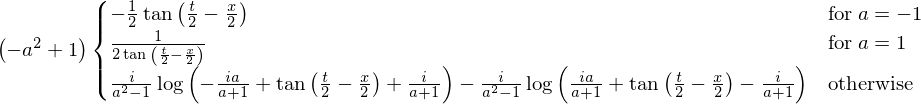

In [28]:
import sympy as sp
sp.init_printing()
x, a, b, c, t = sp.symbols('x a b c t')
sp.integrate((1-a**2)/(1+a**2-2*a*sp.cos(x-t)), x)

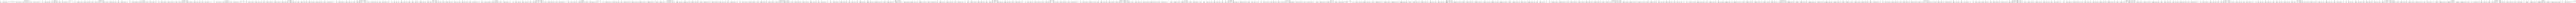

In [35]:
sp.series((1-a**2)/(1+a**2-2*a*sp.cos(x-t)),x,0)
